In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io

In [40]:
df = sns.load_dataset("tips")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [42]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# **Common Data Visualizations**

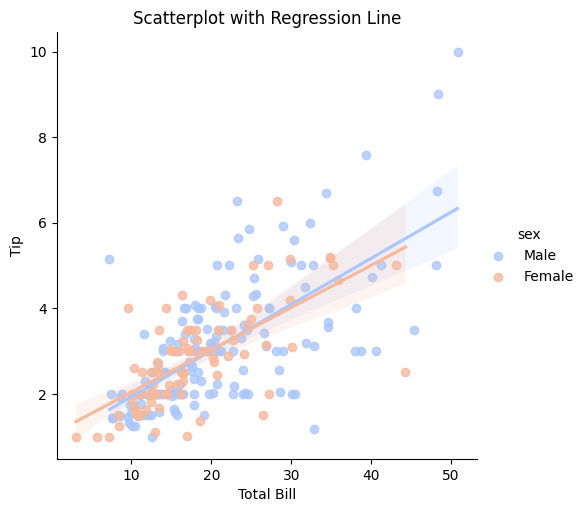

In [44]:
#Visualization 1: Scatterplot
sns.lmplot(x='total_bill', y='tip', data=df, hue='sex', palette='coolwarm')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot with Regression Line')
plt.show()

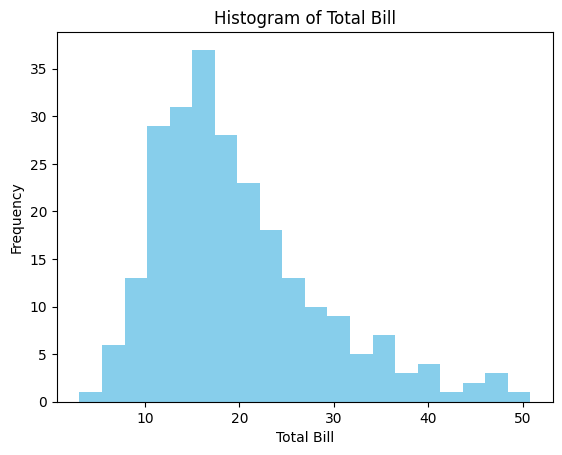

In [45]:
# Visualization 2: Histogram
plt.hist(df['total_bill'], bins=20, color='skyblue')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

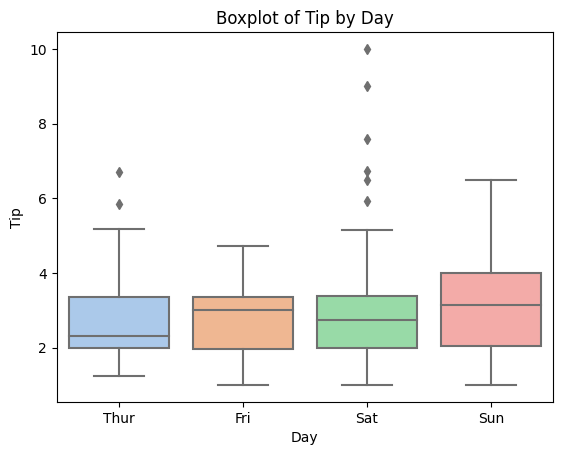

In [46]:
#Visualization 3: Boxplot (Tip x Day)
sns.boxplot(x='day', y='tip', data=df, palette='pastel')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Boxplot of Tip by Day')
plt.show()

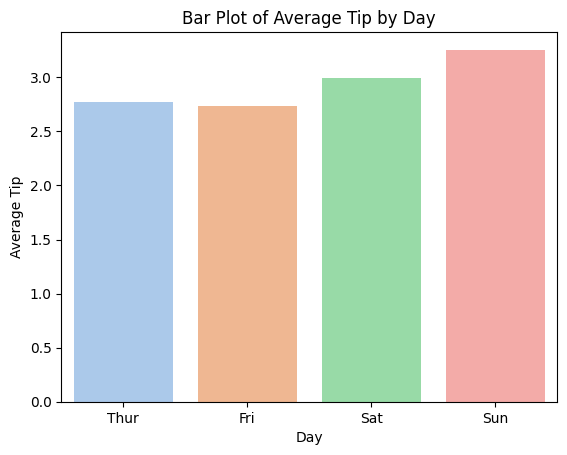

In [47]:
#Visualization 4: Bar Plot
average_tip_by_day = df.groupby('day')['tip'].mean().reset_index()
sns.barplot(x='day', y='tip', data=average_tip_by_day, palette='pastel')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.title('Bar Plot of Average Tip by Day')
plt.show()

<ipython-input-48-125fd4d88677>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


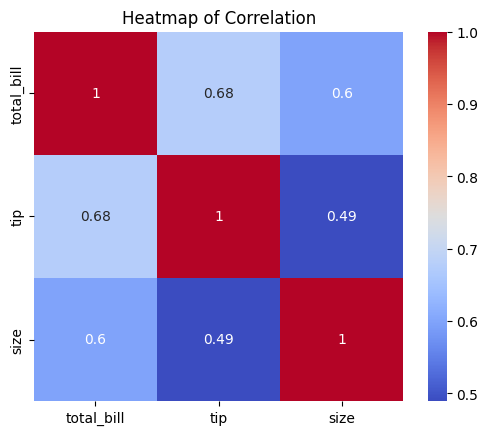

In [48]:
# Visualization 5: Heatmap of Correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation')
plt.show()

# **Feature Implementation**

In [49]:
# Feature 1: Tip Percentage
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Feature 2: Total Bill Per Person
df['total_bill_per_person'] = df['total_bill'] / (df['size'])

# Display updated dataset with added features
print(df.head())


   total_bill   tip     sex smoker  day    time  size  tip_percentage  \
0       16.99  1.01  Female     No  Sun  Dinner     2        5.944673   
1       10.34  1.66    Male     No  Sun  Dinner     3       16.054159   
2       21.01  3.50    Male     No  Sun  Dinner     3       16.658734   
3       23.68  3.31    Male     No  Sun  Dinner     2       13.978041   
4       24.59  3.61  Female     No  Sun  Dinner     4       14.680765   

   total_bill_per_person  
0               8.495000  
1               3.446667  
2               7.003333  
3              11.840000  
4               6.147500  


# **Predictive Analysis using Linear Regression**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Preprocessing: Convert categorical variables into numerical form
pdf = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])

# Split the data into features (X) and target variable (y)
X = pdf.drop('tip', axis=1)
y = pdf['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
pdf.head()

,total_bill,tip,size,tip_percentage,total_bill_per_person,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,5.944673,8.495000,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,16.054159,3.446667,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,16.658734,7.003333,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,13.978041,11.840000,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,14.680765,6.147500,0,1,0,1,0,0,0,1,0,1


In [53]:
#Building the Predictive Model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict tip amount using the test data
y_pred = model.predict(X_test)

In [72]:
# Calculate the mean squared error and R-squared score to evaluate performance of model
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.23
R-squared Score: 0.82


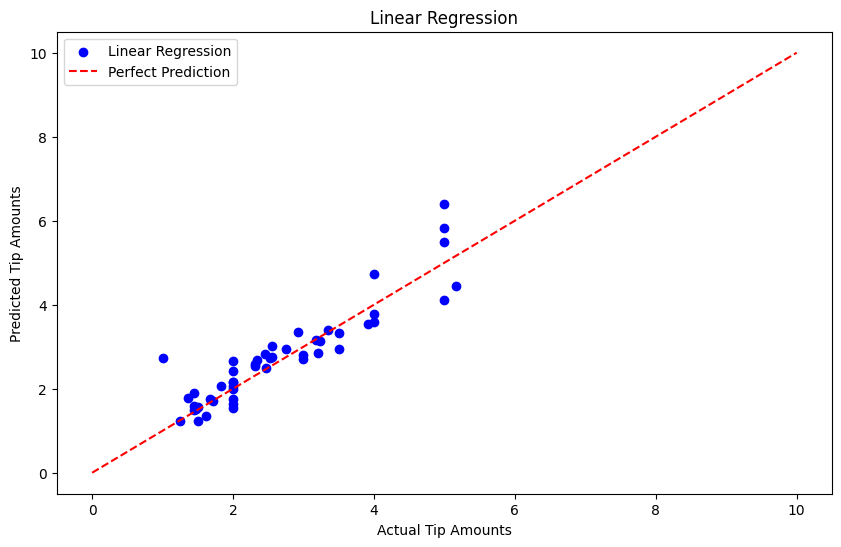

In [55]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')

# Add a 45-degree reference line for perfect predictions
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Regression using Random Forest Regressor:

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
# We have already prepared the training and testing sets while performinig linear regression earlier, so no need to do that here.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [58]:
# Mean squared error and R-squared score to evaulate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [59]:
print("Random Forest Regression:")
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'R-squared Score: {r2_rf:.2f}\n')

Random Forest Regression:
Mean Squared Error: 0.21
R-squared Score: 0.84



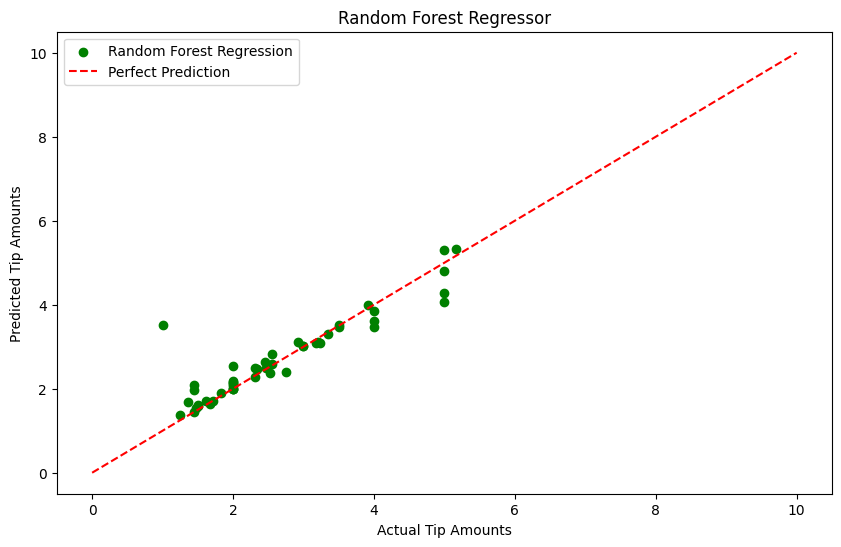

In [60]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')

# Add a 45-degree reference line for perfect predictions
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Perfect Prediction')


plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()


# Regression using Support Vector Machine(SVM):

In [66]:
from sklearn.svm import SVR

In [67]:
# Again, we have already prepared the training and testing sets while performinig linear regression earlier.
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [68]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [69]:
print("Support Vector Regression:")
print(f'Mean Squared Error: {mse_svr:.2f}')
print(f'R-squared Score: {r2_svr:.2f}')

Support Vector Regression:
Mean Squared Error: 0.23
R-squared Score: 0.81


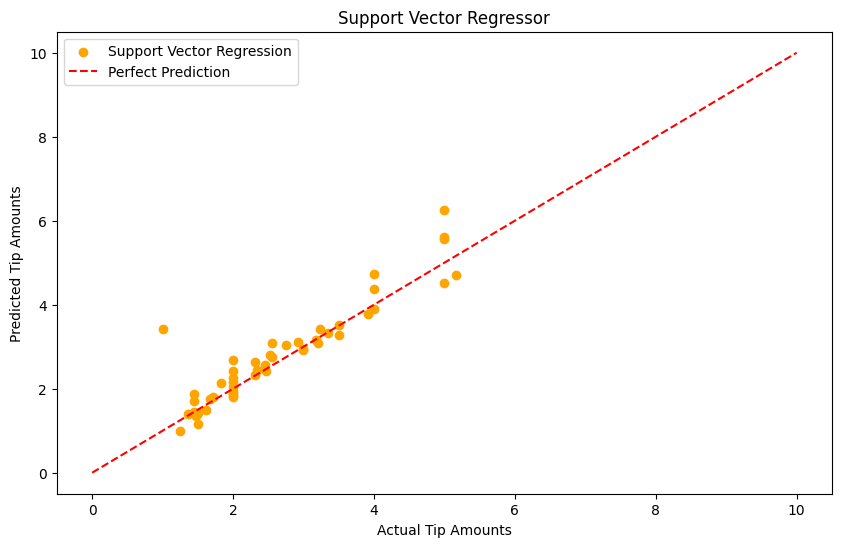

In [70]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='orange', label='Support Vector Regression')

# Add a 45-degree reference line for perfect predictions
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Perfect Prediction')


plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Support Vector Regressor')
plt.legend()
plt.show()

#Open this section to view the comparison of the three regression algorithms together.

When we compare the MSE and R-squared scores of the three regression algorithms, it is observed that Random Forest Regression has the best performance among the three algorithms for predicting tip amounts in the "tips" dataset. It has the lowest Mean Squared Error and the highest R-squared score, indicating better accuracy and a better fit to the data compared to the other algorithms.

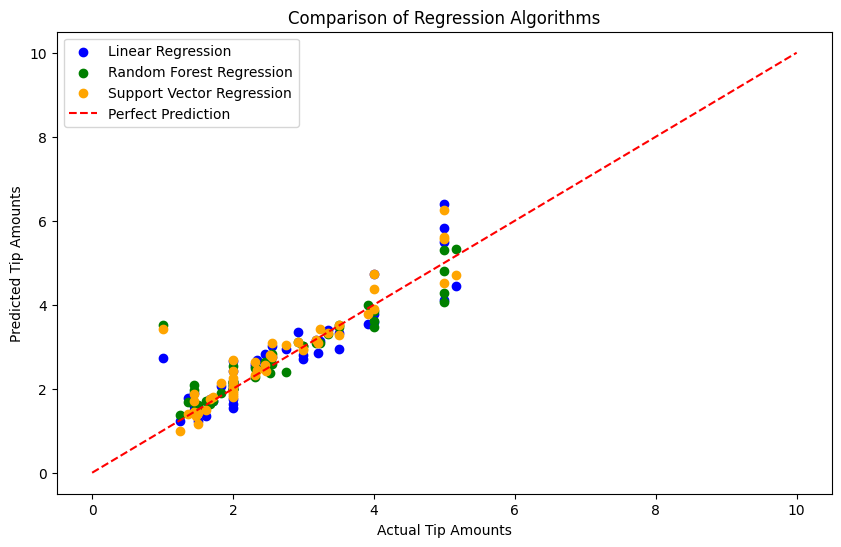

In [71]:
# Compare all three regression algorithms together.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')
plt.scatter(y_test, y_pred_svr, color='orange', label='Support Vector Regression')

plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Comparison of Regression Algorithms')
plt.legend()
plt.show()

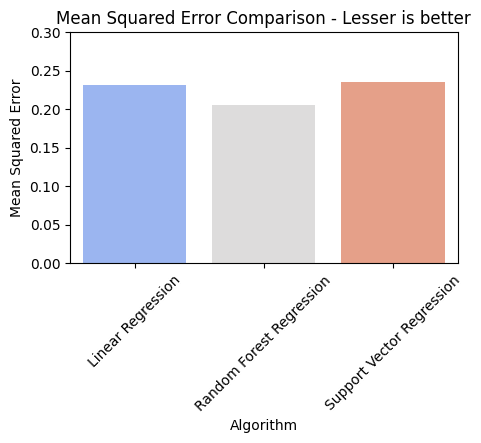

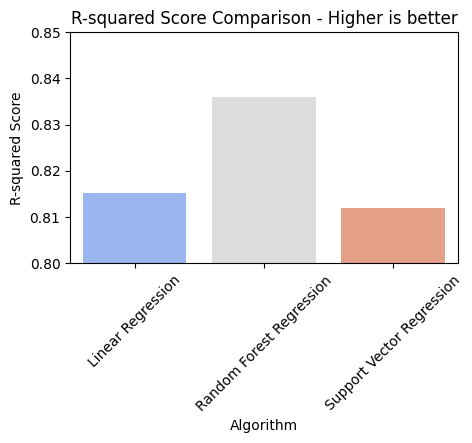

In [82]:
#Comparison of the MSE and R-squared scores of the three algorithms.
metrics_df = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Random Forest Regression', 'Support Vector Regression'],
    'Mean Squared Error': [mse_linear, mse_rf, mse_svr],
    'R-squared Score': [r2_linear, r2_rf, r2_svr]
})

plt.figure(figsize=(5, 3))
sns.barplot(x='Algorithm', y='Mean Squared Error', data=metrics_df, palette='coolwarm')
plt.title('Mean Squared Error Comparison - Lesser is better')
plt.ylim(0, 0.3)
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(x='Algorithm', y='R-squared Score', data=metrics_df, palette='coolwarm')
plt.title('R-squared Score Comparison - Higher is better')
plt.ylim(0.8, 0.85)
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.show()